In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline

In [3]:
x = np.array([[42,2],[39,1]])
y = np.array([545000, 495000])

In [4]:
x

array([[42,  2],
       [39,  1]])

In [5]:
y

array([545000, 495000])

In [6]:
linear_regressor = LinearRegression()
linear_regressor.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

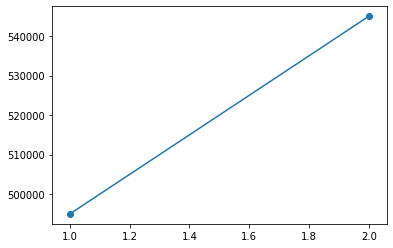

In [7]:
plt.scatter(x[:, 1],y)
plt.plot(x[:, 1], linear_regressor.predict(x))

In [8]:
print(linear_regressor.coef_)
print(linear_regressor.intercept_)

[15000.  5000.]
-94999.99999999977


#### 2.6 Hands_one Project: MSE Cost Function with One Parameter

#### Implementation

In [9]:
# the cost function takes x, y and theta0 as nputs and return the cost
def mse(x,y,theta0):
    m = y.shape[0]
    cost = (1/m) * np.sum((theta0 * x - y)**2)
    return cost


In [10]:
#create soem fake data
x = np.random.normal(2,1,100)
y = 2 * x + np.random.normal(0,1,100)

NameError: name 'ticker' is not defined

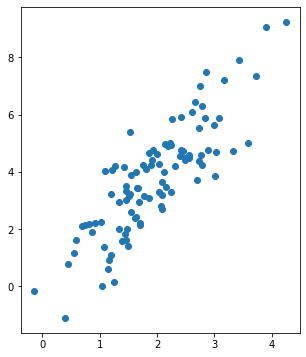

In [11]:
#show scatter plot representing the data
#choose figure size
plt.figure(figsize=(5,6))

plt.scatter(x,y)

#Assure that the ticks are displayed with a step equal to 0.5
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

#draw axis
plt.axhline(0, c='#A9A9A9')
plt.axvline(0, c= '#A9A9A9')

plt.xlabel('x')
plt.ylabel('y')

#assure  x and y axis have the same scale
plt.axis('equal')

In [12]:
#Now we will try to use our cost function with these data and for multiple values of our unique parameters theta0
# We iterate on all_theta0 and calculate the MSE for each and append the cost to all_cost at each iteration

all_theta0 = np.arange(-10, 11)
print(all_theta0)

all_cost = np.array([])
for theta0 in all_theta0:
    cost = mse(x,y,theta0=theta0)
    all_cost = np.append(all_cost, cost)
all_cost

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


array([636.5410681 , 534.53296651, 441.44325628, 357.27193743,
       282.01900994, 215.68447381, 158.26832906, 109.77057567,
        70.19121364,  39.53024299,  17.7876637 ,   4.96347578,
         1.05767922,   6.07027404,  20.00126022,  42.85063776,
        74.61840668, 115.30456696, 164.9091186 , 223.43206162,
       290.873396  ])

Text(0, 0.5, 'cost')

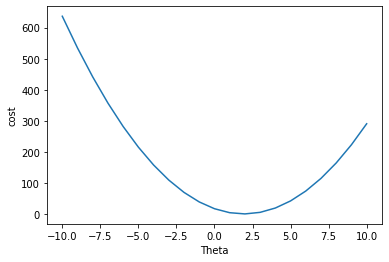

In [13]:
#let plot the cost as a function of theta0
plt.plot(all_theta0, all_cost)
plt.xlabel('Theta')
plt.ylabel('cost')

In [14]:
# the best value for our single parameter(the slope) is at the bottom of the bowl
# the numpy function argmin() returns the index in the list for which the value is minimum
bestt_theta = all_theta0[all_cost.argmin()]
bestt_theta


2

NameError: name 'ticker' is not defined

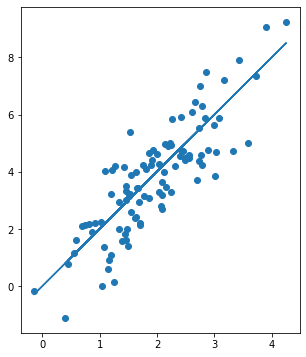

In [15]:
plt.figure(figsize=(5,6))
reg_line_y = bestt_theta * x
plt.scatter(x,y)
plt.plot(x,reg_line_y)

#assure that ticks are displayed with a step equal to 0.5
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

#draw axes
plt.axhline(0, c='#A9A9AA9')
plt.axvline(0, c='#A9A9A9')

plt.xlabel('x')
plt.ylabel('y')

#assure x and y axis have the same scale
plt.axis('equal')

#### The ROC Curve

In [20]:
#construct an imbalanced dataset
np.random.seed(1235)
y_score = np.random.choice([0,1], 1000, p=[0.9,0.1])
#check
y_score.sum()

101

In [21]:
#rndom Model
y_hat = np.random.uniform(0, 1, 1000)

In [22]:
#binarized the model according to a threshold
def binarized(y_hat, threshold):
    return (y_hat > threshold).astype(int)

In [23]:
#Try the threshold of 0.5 and 0.8
#show that the threshold affect samples categorized as "1"
y_hat_binary_50 = binarized(y_hat, 0.5)
y_hat_binary_80 = binarized(y_hat, 0.8)
print(f"Threshold of 0.5: {y_hat_binary_50.mean()}")
print(f"Threshold of 0.8: {y_hat_binary_80.mean()}")

Threshold of 0.5: 0.467
Threshold of 0.8: 0.185


Text(0, 0.5, "Proportion of samples predicted as '1'")

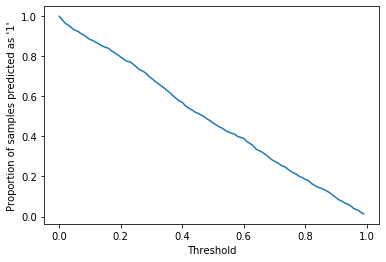

In [25]:
# plot
all_proportions = []
for i in np.arange(0,1,0.01):
    all_proportions.append(binarized(y_hat,i).mean())
plt.plot(np.arange(0,1,0.01), all_proportions)
plt.xlabel('Threshold')
plt.ylabel("Proportion of samples predicted as '1'")

(0, 1)

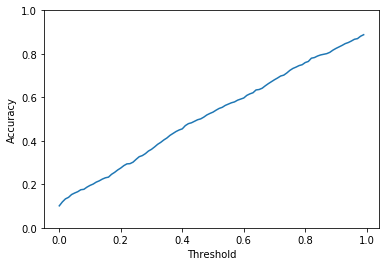

In [26]:
#Model Performance and the limitation of accuracy as an evaluation metric
all_accuracy = []
for i in np.arange(0,1,0.01):
    all_accuracy.append((binarized(y_hat,i) == y_score).mean())
plt.plot(np.arange(0, 1, 0.01), all_accuracy)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.ylim(0,1)

In [29]:
#True and False Positive Ratios(TPR AND FPR)
negative_indexes = np.where(y_score == 0)

